In [2]:
import os.path as path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
RESULTS_PATH = 'results'
df = pd.read_csv(path.join(RESULTS_PATH, 'abortion_results.csv'))

## Total number of players

We compare the total number of players (break down by group) over time between the model and the network.

In [4]:
df_breakdown = df.melt(id_vars=['t', 'Setting', 'Exposure'], value_vars=['A', 'B'])
df_breakdown = df_breakdown.rename(columns={'variable': 'Group'})

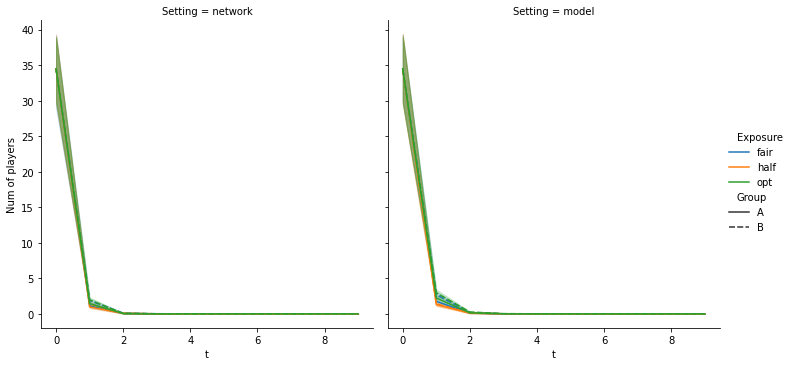

In [5]:
g1 = sns.relplot(data=df_breakdown, x="t", y="value", col="Setting", hue="Exposure", style='Group', kind="line")
g1.set(ylabel='Num of players')

#### Zoom in

We center the x axis around step $t=1$ to highlight the differences between the model and the network (since both start with the same number of users and both drop to zero very quickly, this is the step where most of the differences lie).

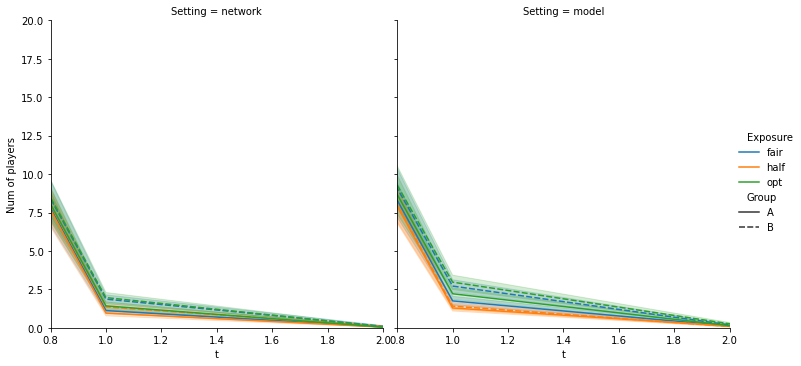

In [6]:
g1.axes[0, 0].set_xlim(0.8, 2)
g1.axes[0, 0].set_ylim(0, 20)
g1.fig

For an better visualization, we show the exposures in different rows:

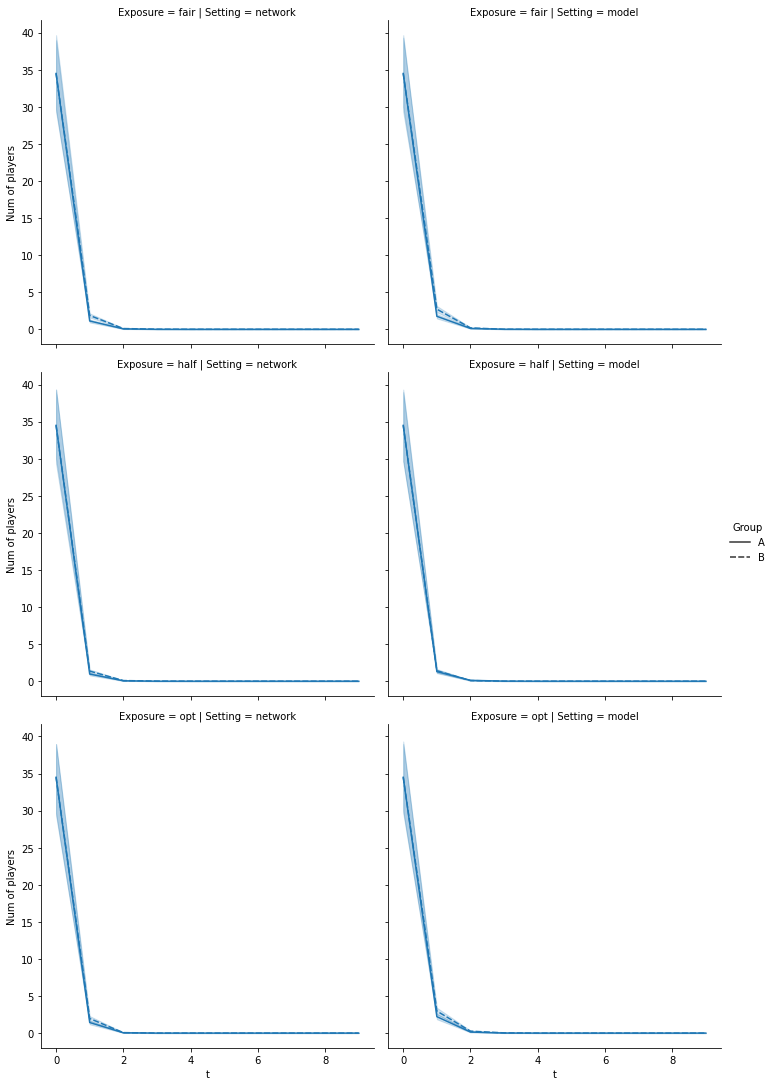

In [7]:
# break down by exposure level
g2 = sns.relplot(data=df_breakdown, x="t", y="value", col="Setting", row="Exposure", style='Group', kind="line")
g2.set(ylabel='Num of players')

#### Zoom in

The graphs below are the number of players by article and exposure level for the first two steps of the propagation when this assumption does not hold. We zoom in centered around step $t=1$ because that's where most differences between the network and the model lie).

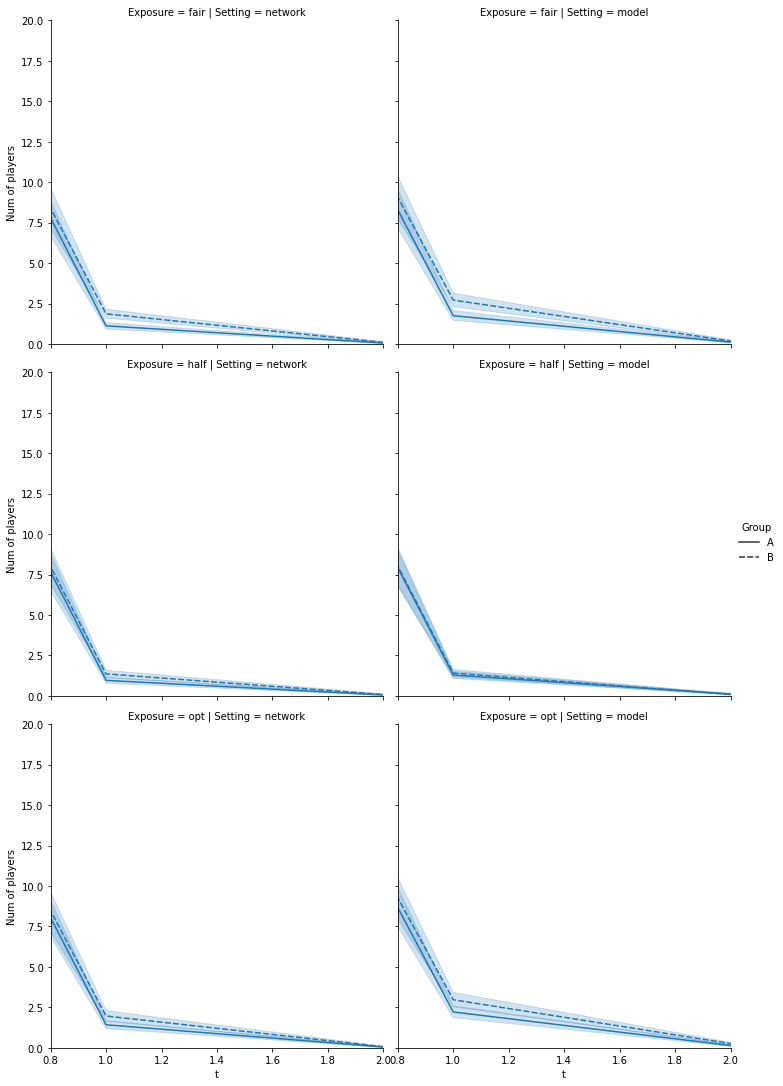

In [8]:
# zoom in
g2.axes[0, 0].set_xlim(0.8, 2)
g2.axes[0, 0].set_ylim(0, 20)
g2.fig

It seems that the model and the network give similar results.

## Evaluation of the assumptions

What happens when we drop some of the assumptions we made in the propagation of the articles through the network?

### Drop Assumption 1: "*Only one of the followers shares the article*"

When we make the assumption, we are sampling only one follower for each user that shared the article and give the follower the choice to share it again. This is to imitate how the model chooses the new generation of users (it clones each user once). The graph below shows the number of players when this assumption does not hold:

In [9]:
df1 = pd.read_csv(path.join(RESULTS_PATH, 'abortion_results_not_takeone.csv'))
df1_breakdown = df1.melt(id_vars=['t', 'Setting', 'Exposure'], value_vars=['A', 'B'])
df1_breakdown = df1_breakdown.rename(columns={'variable': 'Group'})

In [21]:
df1_breakdown['Setting'] = df1_breakdown.Setting.str.capitalize()
df1_breakdown['Exposure'] = df1_breakdown.Exposure.str.capitalize()

'NimbusRoman-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


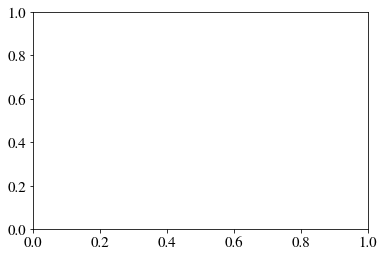

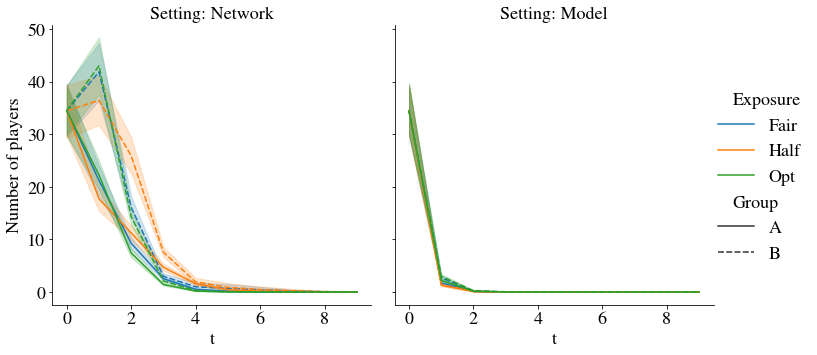

In [28]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rc('font', **{'family': 'serif', 'serif': 'Nimbus Roman'})
plt.rcParams['text.usetex'] = False
plt.rcParams["font.size"] = 18
plt.tick_params(axis='both', labelsize=15)

g3 = sns.relplot(data=df1_breakdown, x="t", y="value", col="Setting", hue="Exposure", style='Group', kind="line")
g3.set(ylabel='Number of players')
g3.set_titles("Setting: {col_name}")

g3.savefig('network_vs_model.pdf', transparent = True)

We observe that the num of players in the network propagation is not always monotonically decreasing. This is because, if the assumption does not hold, the article is shown to *all* the friends (as opposed to just one) and thus the number of users sharing the article could increase wrt the previous step.

### Drop Assumption 2: "*A user can only appear once in the propagation through the network*"

In the network propagation, we make sure that each new generation of users does not include users that have shared the article in the past (we blacklist them). In this section, we look at the differences between the network and the model when we do not follow this assumption, that is, we allow users to repeat (e.g., a users is a follower of one of their followers).

The graphs below are the number of players by article and exposure level for the first two steps of the propagation when Assumption 2 does not hold. We centered around step $t=1$ because that's where most differences between network and model lie).

In [10]:
df2 = pd.read_csv(path.join(RESULTS_PATH, 'abortion_results_no_repetitions.csv'))
df2_breakdown = df2.melt(id_vars=['t', 'Setting', 'Exposure'], value_vars=['A', 'B'])
df2_breakdown = df2_breakdown.rename(columns={'variable': 'Group'})

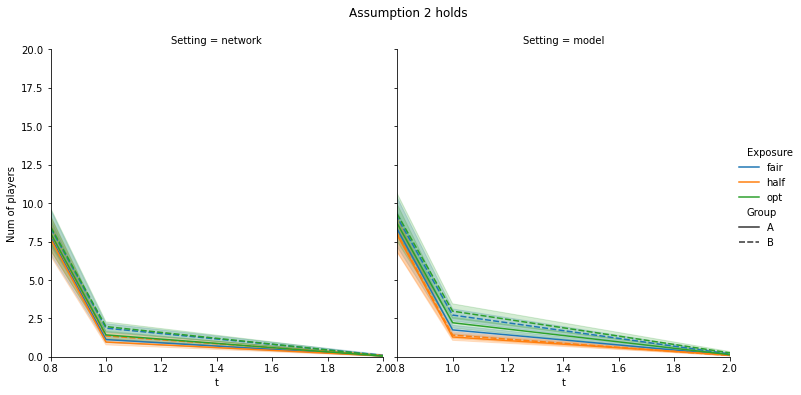

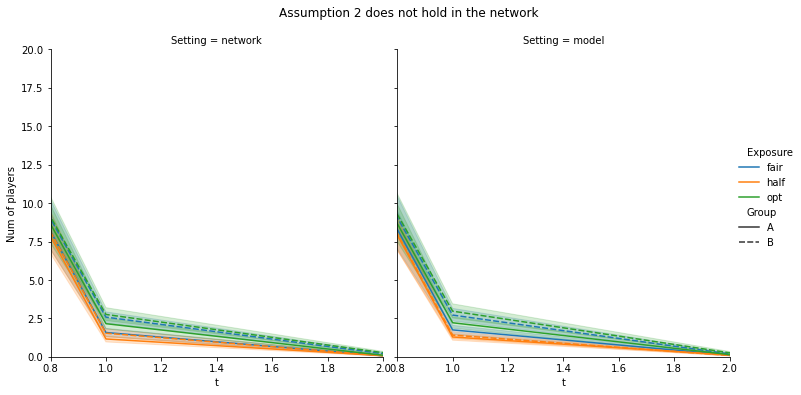

In [11]:
g4 = sns.relplot(data=df2_breakdown, x="t", y="value", col="Setting", hue="Exposure", style='Group', kind="line")
g4.set(ylabel='Num of players')
g4.fig.suptitle('Assumption 2 does not hold in the network', size=12, y=1.05)
g4.axes[0, 0].set_xlim(0.8, 2)
g4.axes[0, 0].set_ylim(0, 20)


# with the assumption:
g1.fig.suptitle('Assumption 2 holds', size=12, y=1.05)
g1.axes[0, 0].set_xlim(0.8, 2)
g1.axes[0, 0].set_ylim(0, 20)
g1.fig

The results show show that the model is closer to the network when we drop the assumption. This could be because the assumption over-restricts the propagation (propagation paths might end earlier because there are no loops).

### Drop Assumption 3: "*Take the edge probabilities instead of sampling from the fitted beta distribution*"

The model uses the beta distributions that we fitted to the labeled seeds in the graph. However, the dataset also has sharing probabilities of each article for nodes that are not labeled. We experiment with propagating the articles sampling from the beta distribution (like in the model) versus using the sharing probabilities in the graph.

In [12]:
df3 = pd.read_csv(path.join(RESULTS_PATH, 'abortion_results_probs.csv'))
df3_breakdown = df3.melt(id_vars=['t', 'Setting', 'Exposure'], value_vars=['A', 'B'])
df3_breakdown = df3_breakdown.rename(columns={'variable': 'Group'})

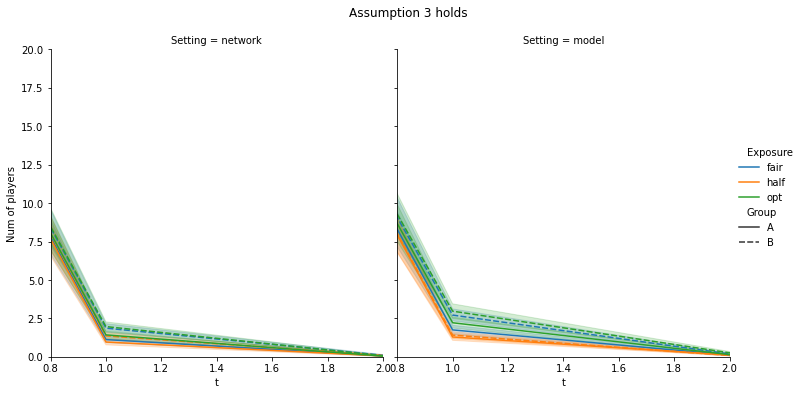

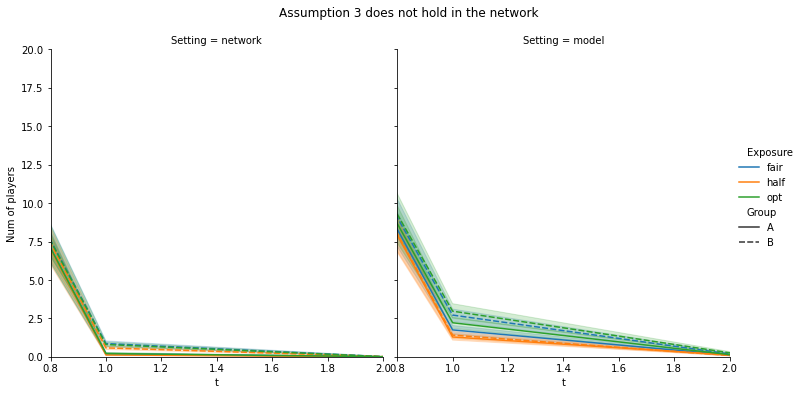

In [13]:
g5 = sns.relplot(data=df3_breakdown, x="t", y="value", col="Setting", hue="Exposure", style='Group', kind="line")
g5.set(ylabel='Num of players')
g5.fig.suptitle('Assumption 3 does not hold in the network', size=12, y=1.05)
g5.axes[0, 0].set_xlim(0.8, 2)
g5.axes[0, 0].set_ylim(0, 20)

# with the assumption:
g1.fig.suptitle('Assumption 3 holds', size=12, y=1.05)
g1.axes[0, 0].set_xlim(0.8, 2)
g1.axes[0, 0].set_ylim(0, 20)
g1.fig

We observe a significant drop in the number of players when we use the graph probabilities. We identify two possible explanations:

1. There is a bias in the sharing distributions of the seeds (labeled nodes) wrt the rest of the network.
2. There is a significant amount of errors in the community detection algorithms we used to label the nodes.

Possible experiment: fit the distributions after applying the community detection algorithms.